# Árboles de decisión y regresión

Este notebook, by [Felipe Alonso Atienza](www.linkedin.com/in/felipe-alonso-atienza)

Vamos a analizar el funcionamiento de los [árboles de decisión](http://scikit-learn.org/stable/modules/tree.html) mediante ejemplos sencillos. 

## Contenidos

1. Árboles de clasificación sobre ejemplos sintéticos
2. Árboles de clasificación sobre ejemplo realista
3. Árboles de regresión

## Librerías y funciones

Lo primero es cargar las librerías y funciones necesarias.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [2]:
# definimos una función para representar el resultado del ajuste
def plot_decision_boundary(X,y,h,model):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .05  # step size in the mesh
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    model = model.fit(X,y)
    Zd = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Zd = Zd.reshape(xx.shape)
    
    Zp = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1] 
    Zp = Zp.reshape(xx.shape)
    
    # Error de clasificación
    ypred = model.predict(X)
    acc = accuracy_score(y,ypred)
    
    plt.figure(1, figsize=(12, 5))
    
    plt.subplot(1,2,1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zd, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zd,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'FRONTERA DECISION\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.subplot(1,2,2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
    plt.axis([x_min, x_max, y_min, y_max])
    plt.contour(xx, yy, Zp, levels=[0], linewidths=2)
    plt.contourf(xx, yy, Zp,cmap=cm, alpha=.5)
    plt.xlabel("$x_1$", fontsize=16)
    plt.ylabel("$x_2$", fontsize=16)
    msg = 'PROBABILIDAD\n Acc: %0.2g' % acc
    plt.title(msg)
    
    plt.tight_layout()
    plt.show()

# 1. Ejemplos sintéticos en clasificación

Trabajaremos con los ejemplos de los Notebooks anteriores.

In [3]:
# ejemplo1
ejemplo1 = pd.read_csv("./data/ex2data1.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo2
ejemplo2 = pd.read_csv("./data/ex2data2.txt", sep=",", header=None, names=['x1', 'x2','label'])

# ejemplo 3: Problema XOR 
np.random.seed(0)

# -- parameters
N     = 800
mu    = 1.5      # Cambia este valor
sigma = 1      # Cambia este valor

# variables auxiliares
unos = np.ones(int(N/4))
random4 = sigma*np.random.randn(int(N/4),1)
random2 = sigma*np.random.randn(int(N/2),1)

# -- features
y3 = np.concatenate([-1*unos,       unos,          unos,         -1*unos]) 
X1 = np.concatenate([-mu + random4, mu + random4, -mu + random4, mu + random4])
X2 = np.concatenate([+mu + random2,               -mu + random2])
X3 = np.hstack((X1,X2))

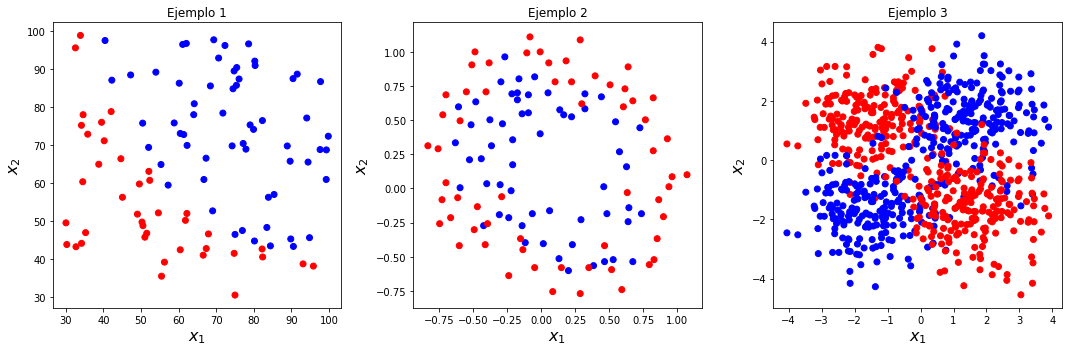

In [4]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(ejemplo1['x1'], ejemplo1['x2'], c=ejemplo1['label'], cmap=cm_bright)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 1')

plt.subplot(1,3,2)
plt.scatter(ejemplo2['x1'], ejemplo2['x2'], c=ejemplo2['label'], cmap=cm_bright)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 2')

plt.subplot(1,3,3)
plt.scatter(X3[:,0], X3[:,1], c=y3, cmap=cm_bright)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)
plt.title('Ejemplo 3')

plt.tight_layout()
plt.show()

## Ejemplo 1

Vamos a entrenar un árbol de decisión sobre el ejemplo 1.

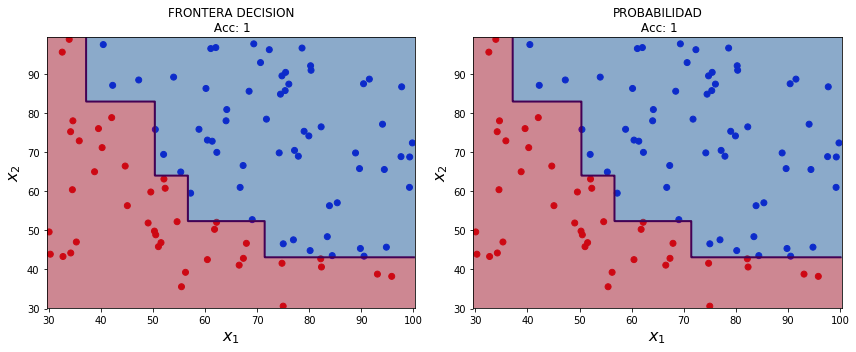

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# preparamos los datos
data1 = ejemplo1.as_matrix()
X1 = data1[:,0:2]
y1 = data1[:,-1]

# creamos el modelo y ajustamos
treeModel1 = DecisionTreeClassifier()
treeModel1.fit(X1, y1)

plot_decision_boundary(X1,y1,0.05,treeModel1)

<div class = "alert alert-success">
EJERCICIO: Entrena un árbol de decisión sobre los ejemplos 2 y 3. Visualiza el resultado y coméntalo.
</div>

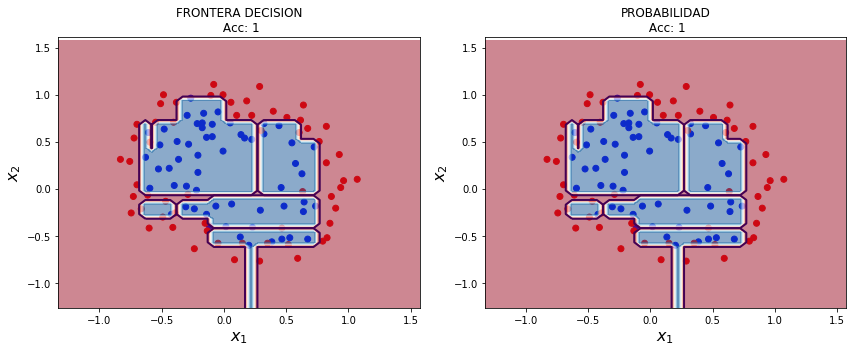

In [6]:
#Ejemplo 2: your code here
# preparamos los datos
data2 = ejemplo2.as_matrix()
X2 = data2[:,0:2]
y2 = data2[:,-1]

# creamos el modelo y ajustamos
treeModel2 = DecisionTreeClassifier()
treeModel2.fit(X2, y2)

plot_decision_boundary(X2,y2,0.05,treeModel2)

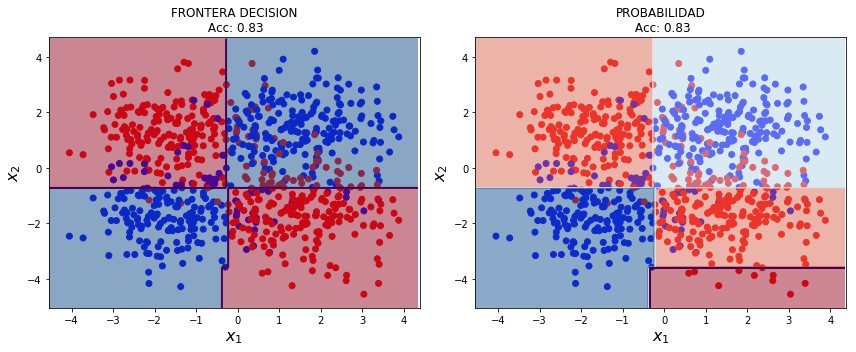

In [13]:
#Ejemplo 3: your code here

# creamos el modelo y ajustamos
treeModel3 = DecisionTreeClassifier(max_depth=3)
treeModel3.fit(X3, y3)

plot_decision_boundary(X3,y3,0.05,treeModel3)

A la vista de los ejemplos anteriores, podemos comprobar varias cosas:

1) Seguramente estamos cometiendo overfitting, porque las fronteras de separación son altamente complejas, ¿cómo podemos controlar la complejidad de un árbol?

2) Las prestaciones las estamos midiendo sobre el conjunto de entrenamiento, por lo que no sabemos el alcance real que tienen estos algoritmos.

Vayamos por partes. Sobre 1)


Los árboles de decisión tienen varios parámetros para controlar la complejidad del mismo (véase la [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Normalmente, los parámetros más relevantes para controlar la complejidad son:

* **profundidad** del árbol (*max_depth*): Si utilizamos un árbol de profundidad 1, sólo podremos dividir el espacio en dos (1 decisión). Si utilizamos un árbol de profundidad 2, tomaremos 4 decisiones, y así sucesivamente. Por tanto, con la profundidad controlamos la complejidad del árbol de decisión, y este parámetro sirve como herramienta para **regularizar* el algoritmo:

    - Un árbol de poca profundidad (poco complejo), tendrá menor riesgo de sufrir overfitting a costa de, potencialmente, incurrir en más error de clasificación.

    - Un árbol de mucha profundidad (muy complejo), tendrá mayor riesgo de sufrir overfitting a costa de, potencialmente, mejorar el error de clasificación.

* **Número mínimo de muestras en una hoja** (*min_samples_leaf*). Podemos forzar a que una hoja tenga un número mínimo de muestras en cada hoja, de tal forma que:
    - Un árbol con un *min_samples_leaf* elevado, tendrá complejidad menor que un árbol con *min_samples_leaf* pequeño.
    
<div class = "alert alert-success">
EJERCICIO: Varía los parámetros *max_depth* y *min_samples_leaf* (de forma independiente y después conjuntamente) y comprueba el resultado, ¿coincide con tu intuición?
</div>

<div class = "alert alert-success">
EJERCICIO: Calcule el valor óptimo de *max_depth* para el ejemplo 3, ¿cuáles son las prestaciones del algoritmo para este ejemplo?
</div>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


# 2. Árboles de clasificación sobre ejemplo realista

Vamos a trabajar sobre un **problema multiclase** de clasificación de frutas a partir de sus propiedades. También abordaremos la visualización de un árbol de decisión.

In [ ]:
fruits = pd.read_table('./data/fruit_data_with_colors.txt')
print(fruits.shape)

fruits.head(10)

In [ ]:
# esto se puede hacer con un label encoder
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

In [ ]:
from sklearn.model_selection import train_test_split

# preparamos los datos
X = fruits[['height', 'width', 'mass', 'color_score']].as_matrix()
y = fruits['fruit_label'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print('Datos train: ', X_train.shape)
print('Datos test:  ', X_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# creamos el modelo y ajustamos
treeModel = DecisionTreeClassifier()
treeModel.fit(X_train, y_train)

y_test_predicted = treeModel.predict(X_test)
print(treeModel.score(X_test,y_test))

## Visualizamos el árbol

In [ ]:
import graphviz

dot_data = tree.export_graphviz(treeModel, out_file=None, 
                         feature_names=['height', 'width', 'mass', 'color_score'],  
                         class_names=['apple','mandarin','orange','lemon'],  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data) 

graph

A la vista de la figura, observamos que:

1) Comenzamos con un Gini elevado ¿cuál es el máximo valor para este problema? y a medida que aumentamos la profundidad el valor Gini diminuye, hasta que en todas las hojas es 0.

2) Es un árbol de profundidad 5.

3) Todas las muestras de entrenamiento están bien clasificadas

4) La variable *color_score* se subdivide consigo misma.

In [ ]:
features = ["mass","width","height","color_score"]
test_sample = 3

print('La muestra de test con etiqueta "%s" y atributos: ' %lookup_fruit_name[y_test[test_sample]])
for i,f in enumerate(features):
    print(' ',f,':',X_test[test_sample,i])

print("ha sido clasificada como: '%s' "  %lookup_fruit_name[y_test_predicted[test_sample]])

<div class = "alert alert-success">
EJERCICIO: Para el ejemplo de la celda anterior, ¿puedes seguir el camino de la decisión?
</div>

# 3. Árboles de regresión

Vamos a aplicar árboles de regresión sobre nuestro ejemplo de regresión sintético:

In [ ]:
N_train = 10
N_test  = 100

# función verdadera g(x)
x = np.linspace(0,1,N_test)
g_x = np.cos(1.5*np.pi*x)

# proceso y
np.random.seed(0) # para asegurar reproducibilidad
epsilon = np.random.randn(N_test) * 0.2
y = g_x + epsilon

# Datos: D = {x_i,y_i}, obtenemos una muestra
idx = np.random.randint(0,N_test,N_train)
x_i = x[idx]
y_i = y[idx]

# YOUR CODE HERE: dibuje la función g(x), y el conjunto de datos x_i,y_i
plt.plot(x,g_x,'r',label='g(x)')
plt.plot(x_i,y_i,'b.',label='y')
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X_train = x_i.reshape(-1, 1)
y_train = y_i
X_test  = x.reshape(-1, 1)

regTree = DecisionTreeRegressor()
regTree.fit(X_train,y_train)

y_hat = regTree.predict(X_test)

# error
error_test = np.mean(np.power(y - y_hat,2)) 


plt.plot(x,g_x,'r',label='$y$')
plt.plot(x_i,y_i,'b.',label='$y_i$')
plt.plot(x,y_hat,'g',label='$\hat{y}$')
plt.title('MSE:%.2f'%error_test)
plt.legend()
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

<div class = "alert alert-success">
EJERCICIO: Modifica los valores de *max_depth* y observa el resultado, ¿concuerda con tu intuición?
</div>

<div class = "alert alert-success">
EJERCICIO: Representa el árbol entrenado
</div>